In [1]:
import pandas as pd
import numpy as np
import csv,json,os
import random

In [2]:
rng = pd.date_range('2020-07-01', periods = 3216,freq = 'H')  #生成时间序列
for i in rng:
    print(i)
    break

2020-07-01 00:00:00


In [12]:
# 随机生成多个特征
feature_name = ['网络慢','投诉','宽带','资费','业务']
feature_data = []
for j in range(len(rng)):
#     a = np.random.randint(0,10000,len(rng)
    feature_data.append(list(np.random.randint(0,10000,len(feature_name))))
feature_name.insert(0,'date')
for k in zip(rng,feature_data):
#     print(k[1])
    k[1].insert(0,str(k[0]))
#     print(k[1])
# print(k)
# print(feature_data)

In [23]:
# a = nfea
with open('data1.csv','wt',newline='',encoding='utf-8') as f2:
    cw = csv.writer(f2)
    cw.writerow(feature_name)
   #采用writerow()方法
    for item in feature_data:
        cw.writerow(item) #将列表的每个元素写到csv文件的一行
   #或采用writerows()方法
   #cw.writerows(l) #将嵌套列表内容写入csv文件，每个外层元素为一行，每个内层元素为一个数据

In [5]:
with open('./data.csv','a',newline='',encoding='utf8') as fr :
    f = csv.writer(fr,delimiter = ',')
    f.writerow(feature_name)
    for i in feature_data:
        f.writerow(i)
    

In [48]:
fr = pd.read_csv('./data.csv')
fr.head(10)

,date,网络慢,投诉,宽带,资费,业务
0,2020-07-01 00:00:00,2220,6567,8157,2666,5508
1,2020-07-01 01:00:00,1657,7546,3267,7013,4926
2,2020-07-01 02:00:00,3007,8211,2388,7676,8431
3,2020-07-01 03:00:00,6808,9268,8153,4326,1741
4,2020-07-01 04:00:00,5003,9569,5987,9803,5644
5,2020-07-01 05:00:00,9036,5825,4859,6464,1200
6,2020-07-01 06:00:00,8053,7240,4393,7262,5247
7,2020-07-01 07:00:00,8111,8221,3656,7183,8607
8,2020-07-01 08:00:00,9241,1803,4656,1982,4719
9,2020-07-01 09:00:00,2474,6447,5958,5228,3627


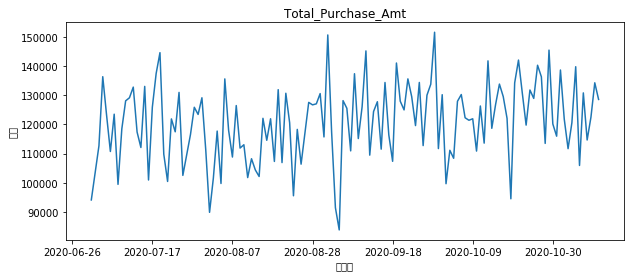

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
#print(df_tmp['date'])
user_balance = pd.read_csv('./data1.csv')
user_balance['date']=user_balance['date'].apply(lambda x:x.split(' ')[0])
df_tmp = user_balance.groupby(['date'])['网络慢', '投诉','宽带','资费','业务'].sum()
df_tmp.reset_index(inplace=True)
df_tmp['date'] = pd.to_datetime(df_tmp['date'], format='%Y-%m-%d')
df_tmp.index = df_tmp['date']

#print(df_tmp)
%matplotlib inline
total_purchase_amt = plt.figure(figsize=(10, 4))
ax = total_purchase_amt.add_subplot(111)
ax.set(title='Total_Purchase_Amt',
       ylabel='人数', xlabel='时间点')
plt.plot(df_tmp['date'], df_tmp['网络慢'])
plt.show()

In [113]:
import pandas as pd
user_balance = pd.read_csv('./data1.csv')
# user_balance['date']=user_balance['date'].apply(lambda x:x.split(' ')[0])
# df_tmp = user_balance.groupby(['date'])['网络慢', '投诉','宽带','资费','业务'].sum()
# df_tmp.reset_index(inplace=True)
# df_tmp['date'] = pd.to_datetime(df_tmp['date'], format='%Y-%m-%d')
# df_tmp.index = df_tmp['date']
# fr = pd.read_csv('./data1.csv')
# print(fr.head(10))
user_balance = pd.read_csv('./data1.csv')
user_balance['date']=user_balance['date'].apply(lambda x:x.split(' ')[0])
#print(user_balance)
def generate_purchase_seq():
#     dateparse = lambda dates: pd.datetime.strptime(dates, '%y-m-%d')
#     user_balance = pd.read_csv('./data1.csv', parse_dates=['date'],
#                                index_col='date', date_parser=dateparse)
    df = user_balance.groupby(['date'])['网络慢'].sum()
    purchase_seq = pd.Series(df, name='value')
    purchase_seq_train = purchase_seq['2020-07-01':'2020-11-04']
    purchase_seq_test = purchase_seq['2020-11-05':'2020-11-11']
    purchase_seq_train.to_csv(path='./network_train.csv', header=True)
    purchase_seq_test.to_csv(path='./network_test.csv', header=True)
generate_purchase_seq()

timeseries_adf :  (-2.06397475117699, 0.2592449964335153, 13, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 4191.005978668395)
timeseries_diff1_adf :  (-6.542516143607562, 9.270661450976668e-09, 12, 109, {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}, 4193.843107210291)
timeseries_diff2_adf :  (-5.615545867454458, 1.1766955956631024e-06, 13, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 4222.922633673087)


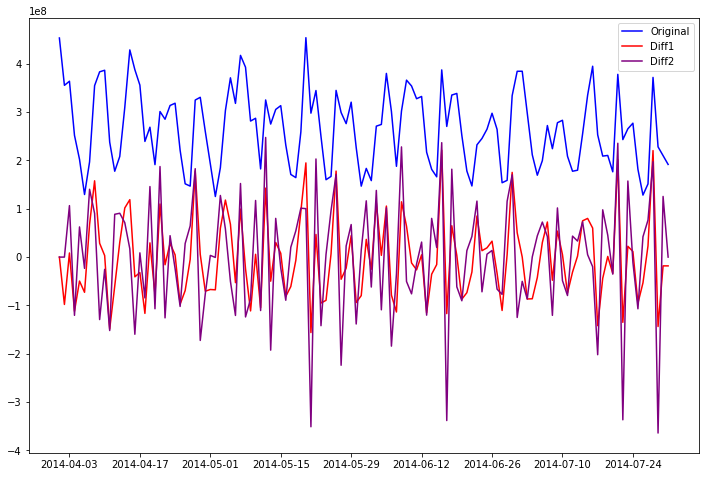

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF


def diff(timeseries):
    timeseries_diff1 = timeseries.diff(1)
    timeseries_diff2 = timeseries_diff1.diff(1)

    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)

    timeseries_adf = ADF(timeseries['value'].tolist())
    timeseries_diff1_adf = ADF(timeseries_diff1['value'].tolist())
    timeseries_diff2_adf = ADF(timeseries_diff2['value'].tolist())

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)

diff(purchase_seq_train)

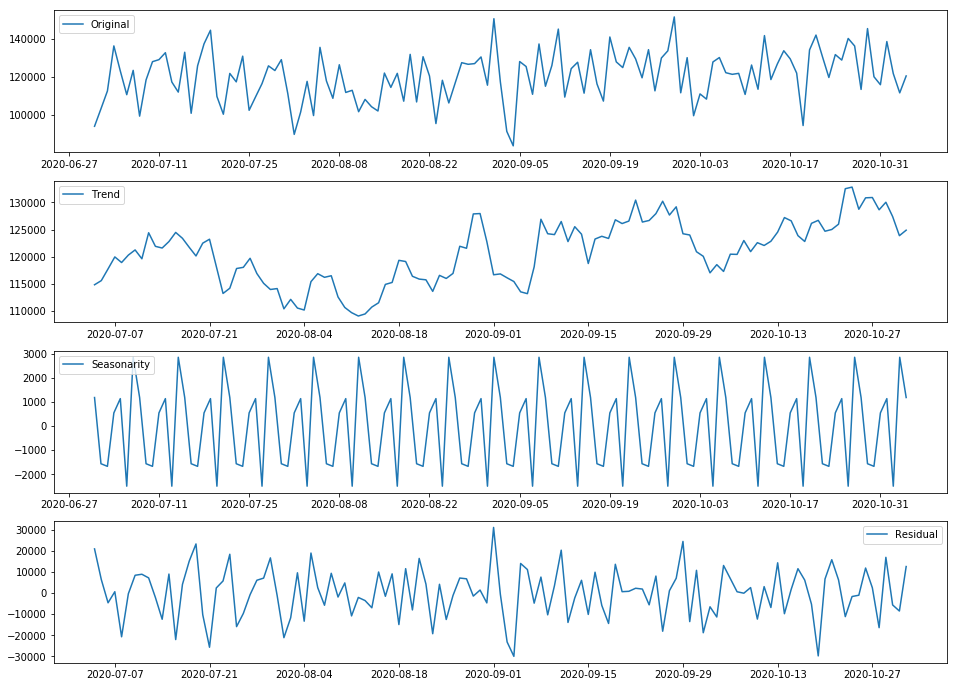

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF


def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./network_train.csv', parse_dates=['date'],
                                 index_col='date', date_parser=dateparse)

decomposing(purchase_seq_train)


timeseries_adf :  (-3.716349366674237, 0.0038889752411464273, 0, 126, {'1%': -3.4833462346078936, '5%': -2.8847655969877666, '10%': -2.5791564575459813}, 2447.0965382213317)
timeseries_diff1_adf :  (-11.156341293610573, 2.859667996898615e-20, 0, 126, {'1%': -3.4833462346078936, '5%': -2.8847655969877666, '10%': -2.5791564575459813}, 2447.354300368105)
timeseries_diff2_adf :  (-13.566278778691789, 2.2594677759827917e-25, 1, 125, {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.579256976}, 2450.049223702535)


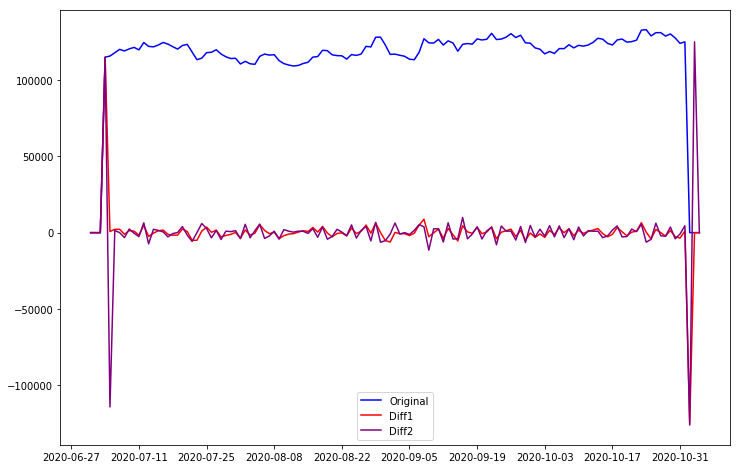

timeseries_adf :  (-6.272088741947285, 3.981469500051797e-08, 13, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 2394.2351604104597)
timeseries_diff1_adf :  (-7.422924077133803, 6.663015923021328e-11, 13, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 2425.1019535253613)
timeseries_diff2_adf :  (-7.912662129335376, 3.910263680148203e-12, 13, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 2467.022503297309)


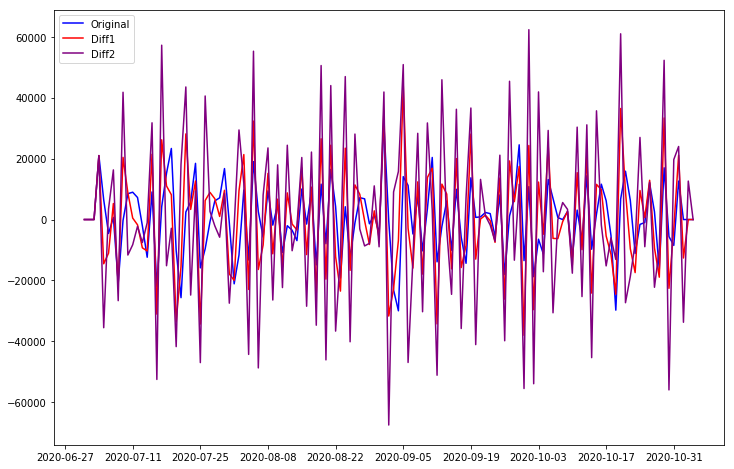

In [100]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./network_train.csv', parse_dates=['date'],
                                 index_col='date', date_parser=dateparse)

decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

diff(trend)


diff(residual)

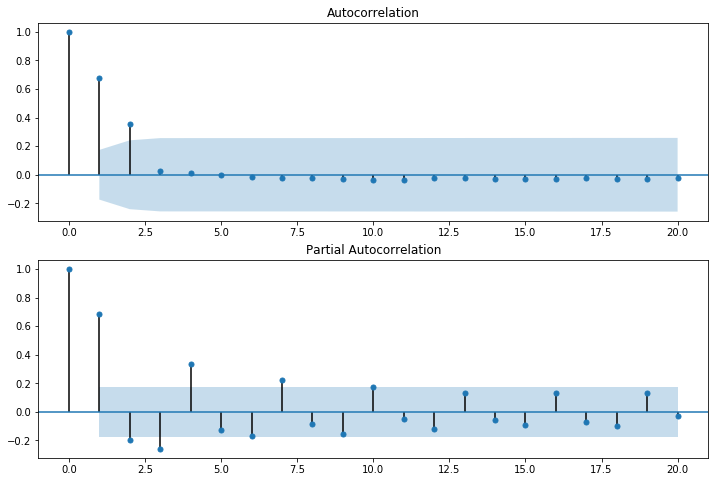

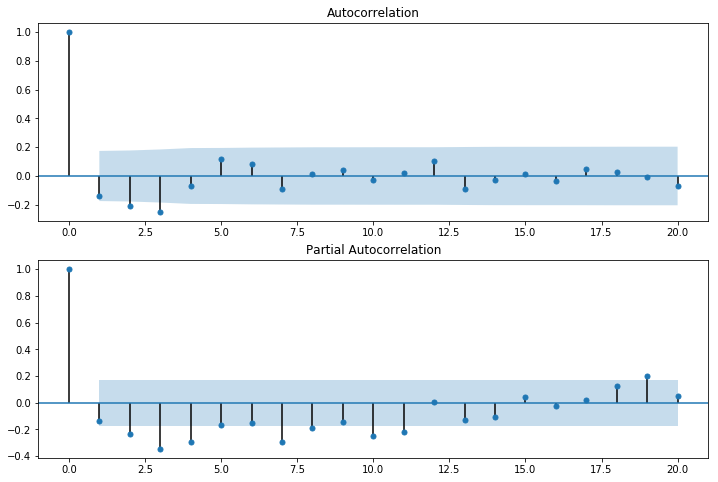

In [101]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./network_train.csv', parse_dates=['date'],
                                 index_col='date', date_parser=dateparse)

decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

autocorrelation(trend, 20)

autocorrelation(residual, 20)

In [102]:
import statsmodels.api as sm


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./network_train.csv', parse_dates=['date'],
                                 index_col='date', date_parser=dateparse)

decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend_evaluate = sm.tsa.arma_order_select_ic(trend, ic=['aic', 'bic'], trend='nc', max_ar=4,
                                            max_ma=4)
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)

residual_evaluate = sm.tsa.arma_order_select_ic(residual, ic=['aic', 'bic'], trend='nc', max_ar=4,
                                            max_ma=4)
print('residual AIC', residual_evaluate.aic_min_order)
print('residual BIC', residual_evaluate.bic_min_order)

D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anaconda

trend AIC (1, 0)
trend BIC (1, 0)


D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anaconda

D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


residual AIC (2, 2)
residual BIC (2, 2)


D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
def ARIMA_Model(timeseries, order):
    model = ARIMA(timeseries, order=order)
    return model.fit(disp=0)
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./network_train.csv', parse_dates=['date'],
                                 index_col='date', date_parser=dateparse)
purchase_seq_test = pd.read_csv('./network_test.csv', parse_dates=['date'],
                                index_col='date', date_parser=dateparse)
decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)
# 趋势序列模型训练
trend_model = ARIMA_Model(trend,(1,2,3))
trend_fit_seq = trend_model.fittedvalues
trend_predict_seq = trend_model.predict(start='2020-07-10', end='2020-11-04', dynamic=True)

# 残差序列模型训练
residual_model = ARIMA_Model(residual, (2,1,2))
residual_fit_seq = residual_model.fittedvalues
residual_predict_seq = residual_model.predict(start='2020-11-05', end='2020-11-11', dynamic=True)

# 拟合训练集
fit_seq = pd.Series(seasonal['value'], index=seasonal.index)
fit_seq = fit_seq.add(trend_fit_seq, fill_value=0)
fit_seq = fit_seq.add(residual_fit_seq, fill_value=0)

plt.plot(fit_seq, color='red', label='fit_seq')
plt.plot(purchase_seq_train, color='blue', label='network_train')
plt.legend(loc='best')
plt.show()

# 预测测试集
# 这里测试数据的周期性是根据seasonal对象打印的结果，看到里面的数据每7天一个周期，2014-08-01~2014-08-10的数据正好和2014-04-04~2014-04-13的数据一致
seasonal_predict_seq = seasonal['2020-11-05':'2020-11-11']

predict_dates = pd.Series(
    ['2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11',]).apply(lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d'))
seasonal_predict_seq.index = predict_dates
predict_seq = pd.Series(seasonal_predict_seq['value'], index=seasonal_predict_seq.index)
predict_seq = predict_seq.add(trend_predict_seq, fill_value=0)
predict_seq = predict_seq.add(residual_predict_seq, fill_value=0)
plt.plot(predict_seq, color='red', label='predict_seq')
plt.plot(purchase_seq_test, color='blue', label='purchase_seq_test')
plt.legend(loc='best')
plt.show()

D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

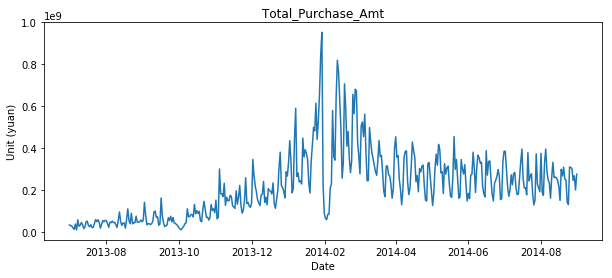

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

user_balance = pd.read_csv('./user_balance_table.csv')

df_tmp = user_balance.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
df_tmp.reset_index(inplace=True)

df_tmp['report_date'] = pd.to_datetime(df_tmp['report_date'], format='%Y%m%d')

df_tmp.index = df_tmp['report_date']
%matplotlib inline
total_purchase_amt = plt.figure(figsize=(10, 4))
ax = total_purchase_amt.add_subplot(111)
ax.set(title='Total_Purchase_Amt',
       ylabel='Unit (yuan)', xlabel='Date')
plt.plot(df_tmp['report_date'], df_tmp['total_purchase_amt'])
plt.show()

In [82]:
import pandas as pd


def generate_purchase_seq():
    dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')
    user_balance = pd.read_csv('./user_balance_table.csv', parse_dates=['report_date'],
                               index_col='report_date', date_parser=dateparse)

    df = user_balance.groupby(['report_date'])['total_purchase_amt'].sum()
    purchase_seq = pd.Series(df, name='value')

    purchase_seq_train = purchase_seq['2014-04-01':'2014-07-31']
    purchase_seq_test = purchase_seq['2014-08-01':'2014-08-10']

    purchase_seq_train.to_csv(path='./purchase_seq_train.csv', header=True)
    purchase_seq_test.to_csv(path='./purchase_seq_test.csv', header=True)


generate_purchase_seq()

timeseries_adf :  (-10.306860002154385, 3.2617324926284154e-18, 0, 126, {'1%': -3.4833462346078936, '5%': -2.8847655969877666, '10%': -2.5791564575459813}, 2471.9181052629447)
timeseries_diff1_adf :  (-6.569204111007641, 8.014946906403082e-09, 10, 116, {'1%': -3.4880216384691867, '5%': -2.8867966864160075, '10%': -2.5802408234244947}, 2482.406027886334)
timeseries_diff2_adf :  (-6.822718828881704, 1.9830641442598927e-09, 13, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 2506.8367528944746)


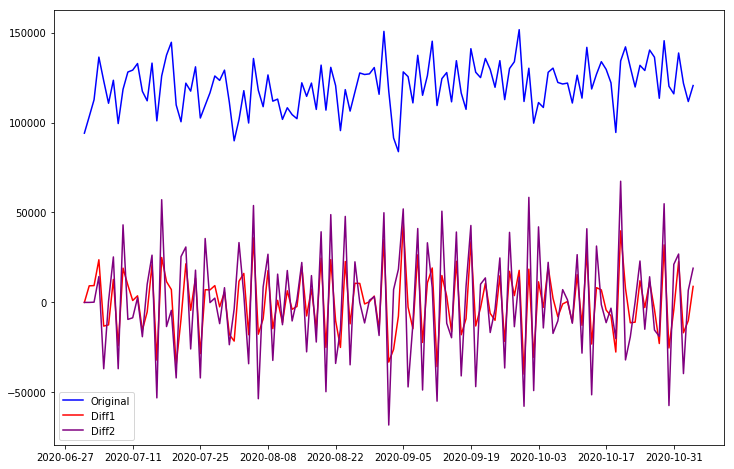

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF


def diff(timeseries):
    timeseries_diff1 = timeseries.diff(1)
    timeseries_diff2 = timeseries_diff1.diff(1)

    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)

    timeseries_adf = ADF(timeseries['value'].tolist())
    timeseries_diff1_adf = ADF(timeseries_diff1['value'].tolist())
    timeseries_diff2_adf = ADF(timeseries_diff2['value'].tolist())

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./network_train.csv', parse_dates=['date'],
                                 index_col='date', date_parser=dateparse)

diff(purchase_seq_train)

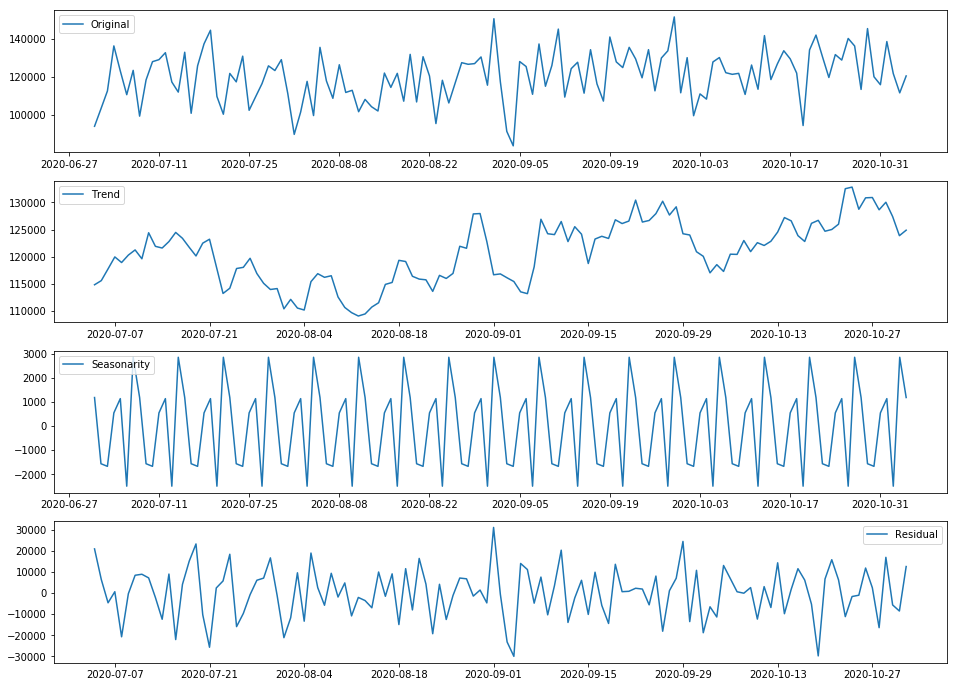

timeseries_adf :  (-3.716349366674237, 0.0038889752411464273, 0, 126, {'1%': -3.4833462346078936, '5%': -2.8847655969877666, '10%': -2.5791564575459813}, 2447.0965382213317)
timeseries_diff1_adf :  (-11.156341293610573, 2.859667996898615e-20, 0, 126, {'1%': -3.4833462346078936, '5%': -2.8847655969877666, '10%': -2.5791564575459813}, 2447.354300368105)
timeseries_diff2_adf :  (-13.566278778691789, 2.2594677759827917e-25, 1, 125, {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.579256976}, 2450.049223702535)


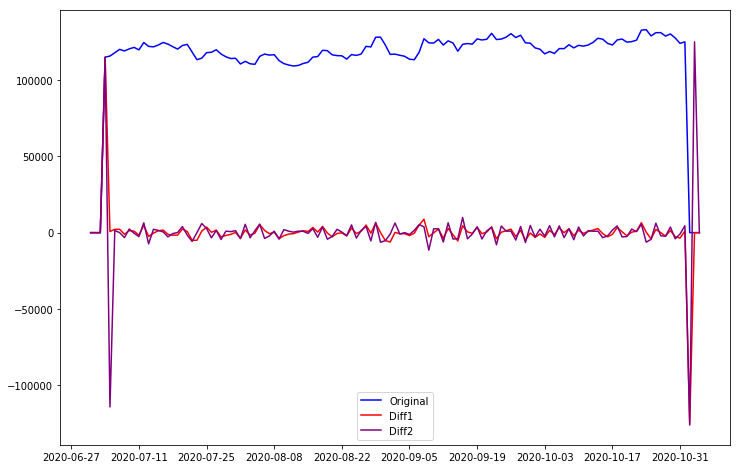

timeseries_adf :  (-6.272088741947285, 3.981469500051797e-08, 13, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 2394.2351604104597)
timeseries_diff1_adf :  (-7.422924077133803, 6.663015923021328e-11, 13, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 2425.1019535253613)
timeseries_diff2_adf :  (-7.912662129335376, 3.910263680148203e-12, 13, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 2467.022503297309)


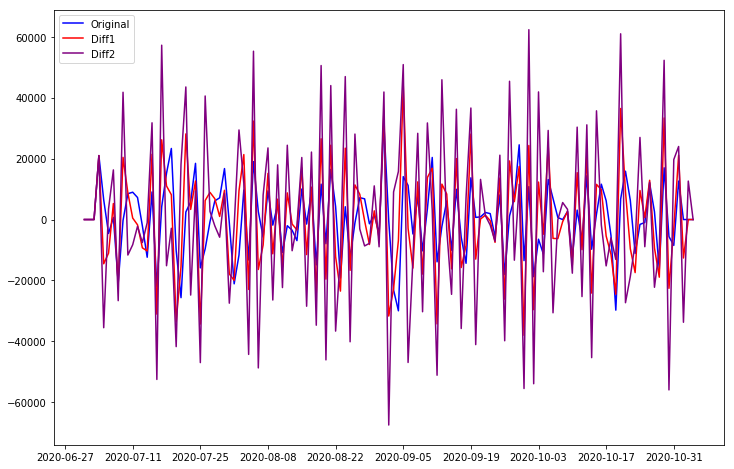

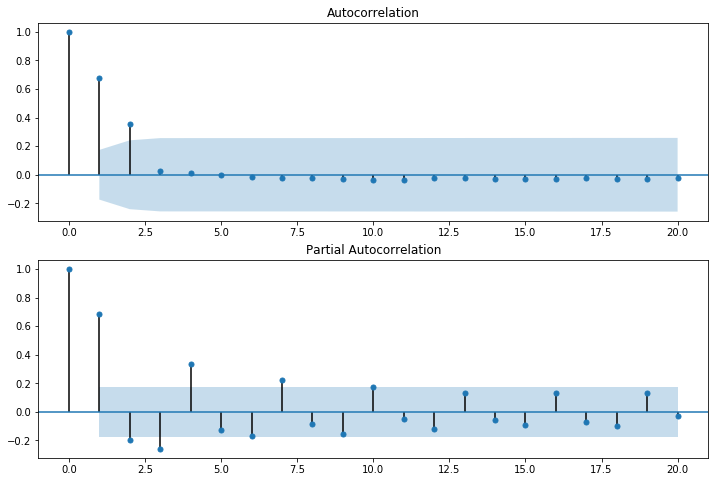

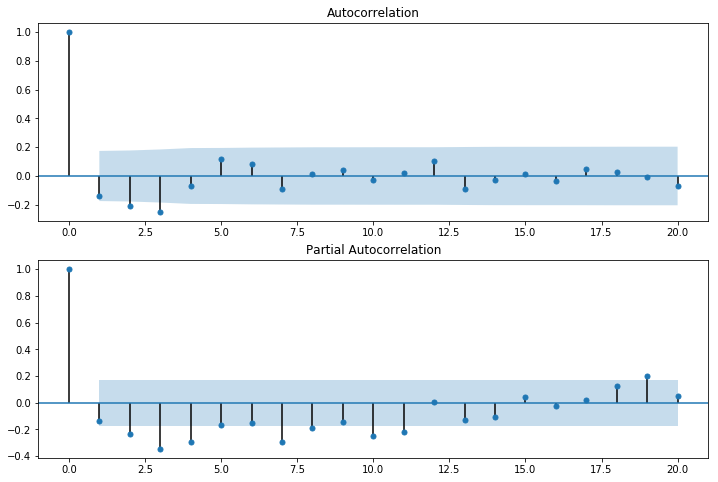

D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anaconda

trend AIC (1, 0)
trend BIC (1, 0)


D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anaconda

D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


residual AIC (2, 2)
residual BIC (2, 2)


D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\xiaoxiao\anacondaxtt\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\xiaoxiao\anacondaxtt\lib\site-packages\scipy\signal\signaltoo

ValueError: Start must be >= k_ar for conditional MLE or dynamic forecast. Got 0

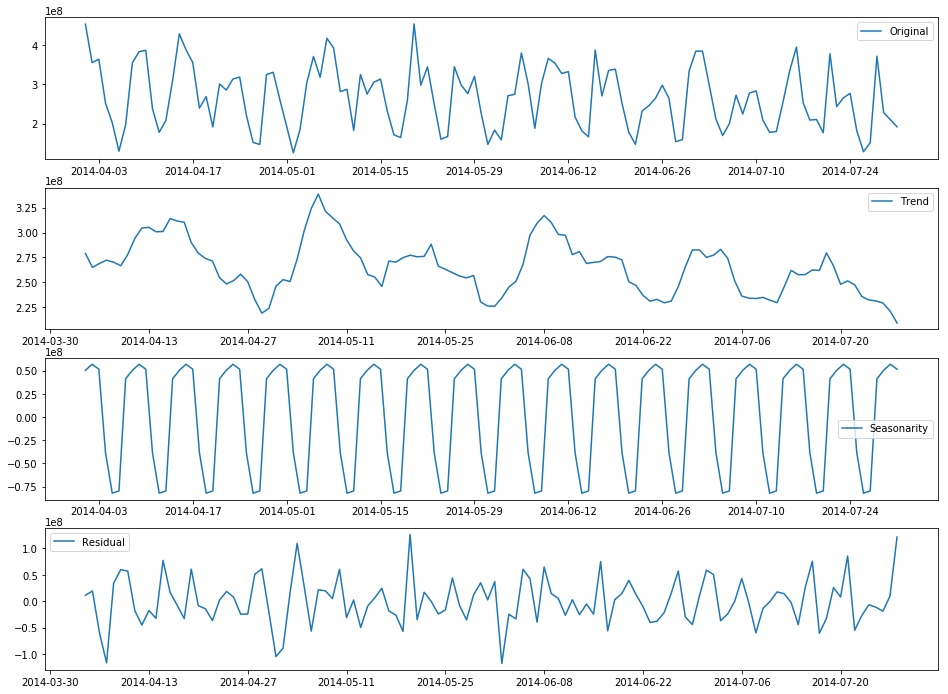

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF


def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)

decomposing(purchase_seq_train)


timeseries_adf :  (-3.2368487584485877, 0.017948383665881536, 0, 121, {'1%': -3.485585145896754, '5%': -2.885738566292665, '10%': -2.5796759080663887}, 3971.5751227480287)
timeseries_diff1_adf :  (-10.571816201699768, 7.2723798146224e-19, 0, 121, {'1%': -3.485585145896754, '5%': -2.885738566292665, '10%': -2.5796759080663887}, 3970.0252957725997)
timeseries_diff2_adf :  (-5.522044427904818, 1.8681654787398006e-06, 8, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 3975.173191562041)


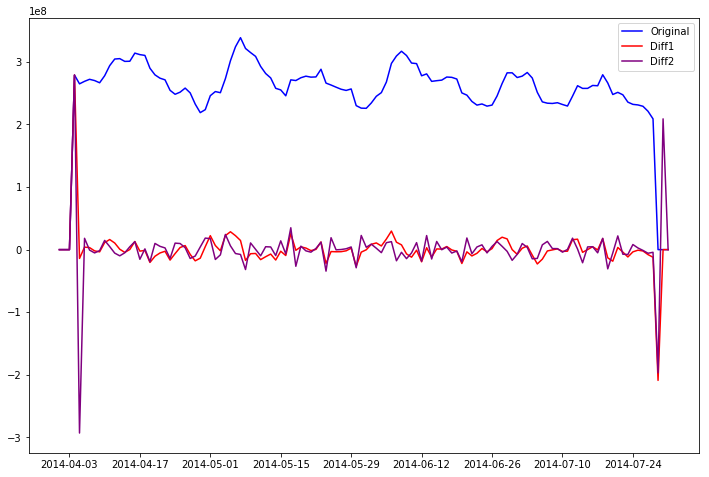

timeseries_adf :  (-6.29021210464834, 3.614727756796546e-08, 8, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 4080.577975834708)
timeseries_diff1_adf :  (-5.903150268380973, 2.747737630041955e-07, 13, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 4107.235275181308)
timeseries_diff2_adf :  (-6.644726878644903, 5.300796399129797e-09, 13, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 4137.527983157888)


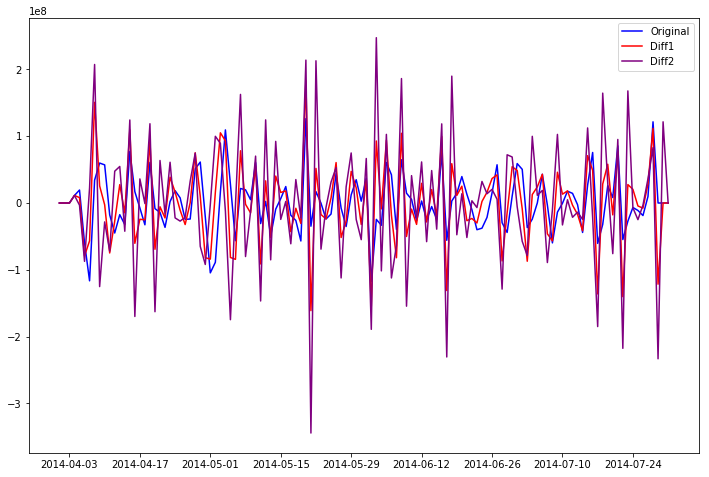

In [86]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)

decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

diff(trend)


diff(residual)


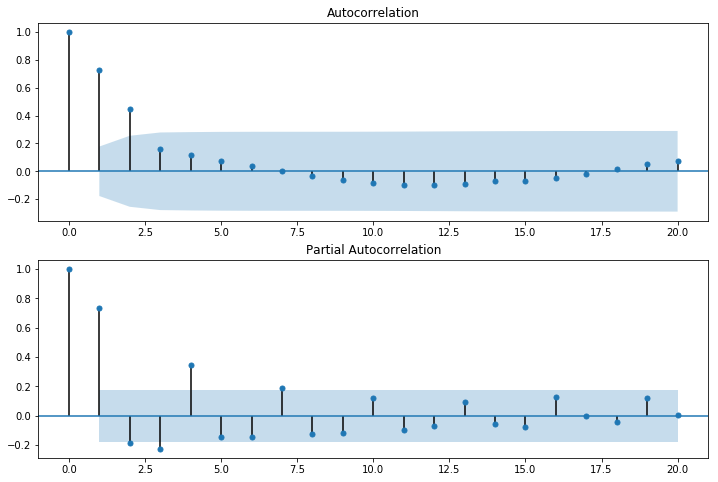

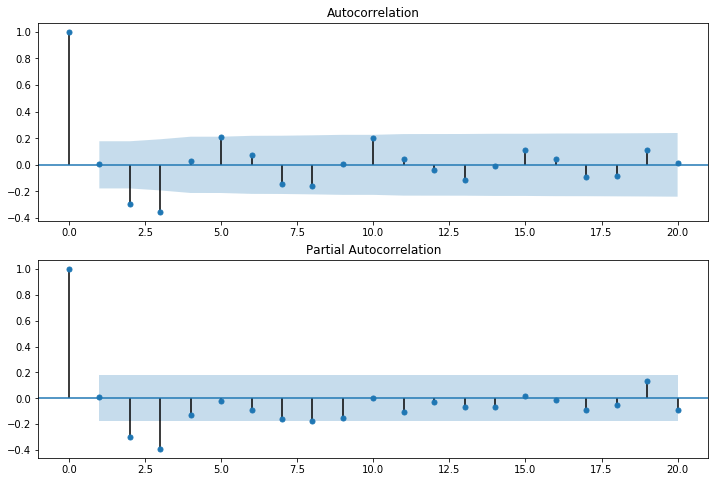

In [87]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)

decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

autocorrelation(trend, 20)

autocorrelation(residual, 20)

In [88]:
import statsmodels.api as sm


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)

decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend_evaluate = sm.tsa.arma_order_select_ic(trend, ic=['aic', 'bic'], trend='nc', max_ar=4,
                                            max_ma=4)
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)

residual_evaluate = sm.tsa.arma_order_select_ic(residual, ic=['aic', 'bic'], trend='nc', max_ar=4,
                                            max_ma=4)
print('residual AIC', residual_evaluate.aic_min_order)
print('residual BIC', residual_evaluate.bic_min_order)


# trend AIC (1, 0)
# trend BIC (1, 0)

# residual AIC (2, 1)
# residual BIC (2, 1)

D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anaconda

trend AIC (1, 0)
trend BIC (1, 0)


D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anaconda

residual AIC (2, 1)
residual BIC (2, 1)


D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


D:\xiaoxiao\anacondaxtt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\xiaoxiao\anacondaxtt\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\xiaoxiao\anacondaxtt\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\xiaoxiao\anacondaxtt\lib\site-packages\scipy\signal\signaltoo

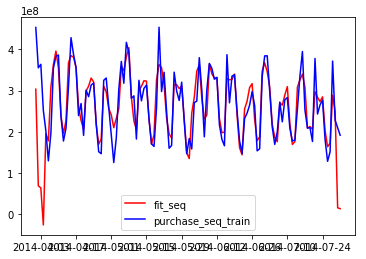

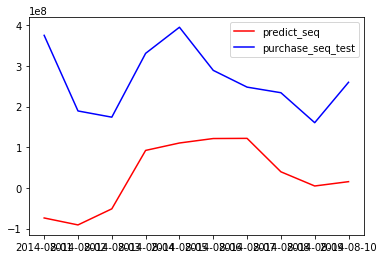

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
def ARIMA_Model(timeseries, order):
    model = ARIMA(timeseries, order=order)
    return model.fit(disp=0)
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)
purchase_seq_test = pd.read_csv('./purchase_seq_test.csv', parse_dates=['report_date'],
                                index_col='report_date', date_parser=dateparse)
decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)
# 趋势序列模型训练
trend_model = ARIMA_Model(trend, (1, 0, 0))
trend_fit_seq = trend_model.fittedvalues
trend_predict_seq = trend_model.predict(start='2014-08-01', end='2014-08-10', dynamic=True)

# 残差序列模型训练
residual_model = ARIMA_Model(residual, (2, 0, 1))
residual_fit_seq = residual_model.fittedvalues
residual_predict_seq = residual_model.predict(start='2014-08-01', end='2014-08-10', dynamic=True)

# 拟合训练集
fit_seq = pd.Series(seasonal['value'], index=seasonal.index)
fit_seq = fit_seq.add(trend_fit_seq, fill_value=0)
fit_seq = fit_seq.add(residual_fit_seq, fill_value=0)

plt.plot(fit_seq, color='red', label='fit_seq')
plt.plot(purchase_seq_train, color='blue', label='purchase_seq_train')
plt.legend(loc='best')
plt.show()

# 预测测试集
# 这里测试数据的周期性是根据seasonal对象打印的结果，看到里面的数据每7天一个周期，2014-08-01~2014-08-10的数据正好和2014-04-04~2014-04-13的数据一致
seasonal_predict_seq = seasonal['2014-04-04':'2014-04-13']

predict_dates = pd.Series(
    ['2014-08-01', '2014-08-02', '2014-08-03', '2014-08-04', '2014-08-05', '2014-08-06', '2014-08-07', '2014-08-08',
     '2014-08-09', '2014-08-10']).apply(lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d'))
seasonal_predict_seq.index = predict_dates
predict_seq = pd.Series(seasonal_predict_seq['value'], index=seasonal_predict_seq.index)
predict_seq = predict_seq.add(trend_predict_seq, fill_value=0)
predict_seq = predict_seq.add(residual_predict_seq, fill_value=0)
plt.plot(predict_seq, color='red', label='predict_seq')
plt.plot(purchase_seq_test, color='blue', label='purchase_seq_test')
plt.legend(loc='best')
plt.show()